In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import seaborn as sbn

In [2]:
%matplotlib inline

In [54]:
data = pd.read_csv('dataset/train.csv')

In [55]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
target = data.pop('Survived')

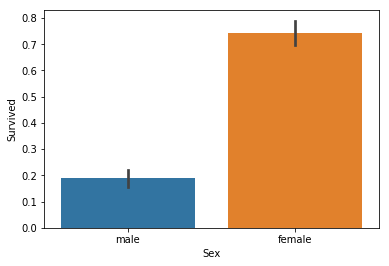

In [57]:
sbn.barplot(x=data['Sex'], y=target, data=data);

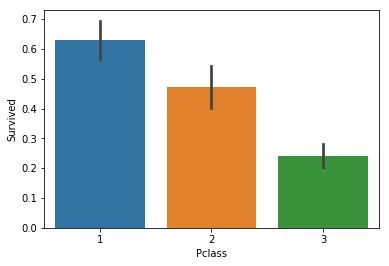

In [58]:
sbn.barplot(x=data['Pclass'], y=target, data=data);

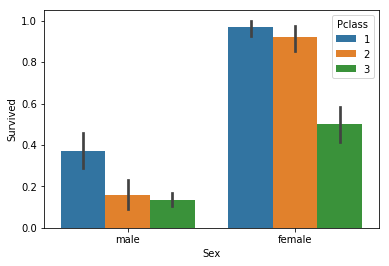

In [59]:
sbn.barplot(x=data['Sex'], y=target, hue=data['Pclass'], data=data);

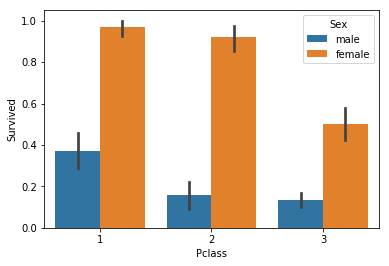

In [60]:
sbn.barplot(x=data['Pclass'], y=target, hue=data['Sex'], data=data)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


Age, Cabin, Embarked shows missing data
find the missiong value and replace

In [62]:
x['Age'].value_counts(dropna=False)

NaN       177
 24.00     30
 22.00     27
 18.00     26
 28.00     25
 19.00     25
 30.00     25
 21.00     24
 25.00     23
 36.00     22
 29.00     20
 32.00     18
 26.00     18
 35.00     18
 27.00     18
 16.00     17
 31.00     17
 34.00     15
 23.00     15
 33.00     15
 20.00     15
 39.00     14
 17.00     13
 42.00     13
 40.00     13
 45.00     12
 38.00     11
 50.00     10
 2.00      10
 4.00      10
         ... 
 28.50      2
 63.00      2
 0.83       2
 30.50      2
 70.00      2
 57.00      2
 0.75       2
 13.00      2
 59.00      2
 10.00      2
 64.00      2
 40.50      2
 45.50      2
 32.50      2
 20.50      1
 24.50      1
 0.67       1
 70.50      1
 0.92       1
 74.00      1
 34.50      1
 14.50      1
 80.00      1
 12.00      1
 53.00      1
 36.50      1
 55.50      1
 66.00      1
 23.50      1
 0.42       1
Name: Age, Length: 89, dtype: int64

In [63]:
# Replace missing value with it's mean

data['Age'].fillna(data['Age'].mean(), inplace=True)

In [64]:
data['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [65]:
# Replace missing value with Mode

data['Embarked'].fillna('S', inplace=True)

In [66]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return 'None'
data['Cabin'] = data['Cabin'].apply(clean_cabin)

In [67]:
data['Cabin'].head()

0    None
1       C
2    None
3       C
4    None
Name: Cabin, dtype: object

In [68]:
data['Cabin'].value_counts(dropna=False)

None    687
C        59
B        47
D        33
E        32
A        15
F        13
G         4
T         1
Name: Cabin, dtype: int64

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [70]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


In [71]:
del data['PassengerId']

In [72]:
# convert sex categorical to numeric
data['Sex'].replace(['female','male'],[0,1],inplace=True)

In [73]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,None,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S
4,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,None,S


In [75]:
#x.fillna(0)
data['Cabin'].value_counts(dropna=False)

None    687
C        59
B        47
D        33
E        32
A        15
F        13
G         4
T         1
Name: Cabin, dtype: int64

In [78]:
def age_band(dl):
    if  dl <= 10.0 : return 'Age_band_1'
    elif 10.0 < dl <= 20.0 : return 'Age_band_2'
    elif 20.0 < dl <= 30.0 : return 'Age_band_3'
    elif 30.0 < dl <= 40.0 : return 'Age_band_4'
    elif 40.0 < dl <= 50.0 : return 'Age_band_5'
    elif 50.0 < dl <= 60.0 : return 'Age_band_6'
    elif 60.0 < dl <= 70.0 : return 'Age_band_7'
    elif 70.0 < dl <= 80.0 : return 'Age_band_8'
    elif 80.0 < dl <= 90.0 : return 'Age_band_9'
    elif 90.0 < dl <= 100.0 : return 'Age_band_10'

    #else: return 'None'

data['Age'] = data['Age'].map(age_band)

In [79]:
data['Age'].value_counts(dropna=False)

Age_band_3    407
Age_band_4    155
Age_band_2    115
Age_band_5     86
Age_band_1     64
Age_band_6     42
Age_band_7     17
Age_band_8      5
Name: Age, dtype: int64

In [80]:
# create dummy variables at a time for all categorical variable

categorical_variable = ['Age','Pclass','Cabin','Embarked']

for variable in categorical_variable:
    # create missing data wirth 'Missing' world
    data[variable].fillna('Missing', inplace=True)
    # Create array od fummys
    dummies = pd.get_dummies(data[variable], prefix=variable)
    # Update  x to tindicate dummies and drop the main variable
    
    data= pd.concat([data, dummies], axis=1)
    data.drop([variable], axis=1, inplace=True)
    

In [81]:
data.head()

,Name,Sex,SibSp,Parch,Ticket,Fare,Age_Age_band_1,Age_Age_band_2,Age_Age_band_3,Age_Age_band_4,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,"Allen, Mr. William Henry",1,0,0,373450,8.0500,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [83]:
del data['Cabin_T']

In [90]:
del data['Ticket']
del data['Name']

In [91]:
data.shape

(891, 26)

In [92]:
data.columns

Index(['Sex', 'SibSp', 'Parch', 'Fare', 'Age_Age_band_1', 'Age_Age_band_2',
       'Age_Age_band_3', 'Age_Age_band_4', 'Age_Age_band_5', 'Age_Age_band_6',
       'Age_Age_band_7', 'Age_Age_band_8', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_None', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [93]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(data,target)
print('C-stat', roc_auc_score(y, model.oob_prediction_))

C-stat 0.861073829078


In [95]:
model.feature_importances_
srt =pd.Series(model.feature_importances_,index=data.columns)
type(srt)

pandas.core.series.Series

In [96]:
srt = srt.sort_values(axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

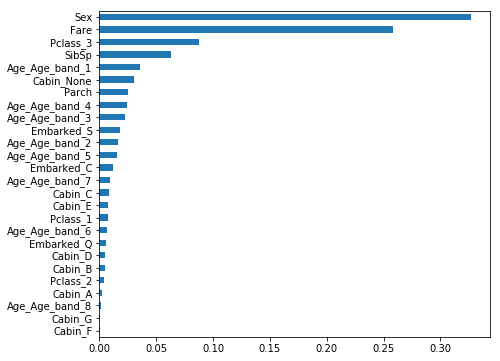

In [97]:
#feature = pd.Series(model.feature_importances_, index=x.columns)
#feature.sort()
srt.plot(kind='barh', figsize=(7,6))

In [99]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(data,target)

3.52 s ± 150 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [100]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(data,target)

4.03 s ± 457 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


30 Trees
C-stat 0.855172615814
 
50 Trees
C-stat 0.858389522683
 
100 Trees
C-stat 0.861073829078
 
200 Trees
C-stat 0.861326814304
 
500 Trees
C-stat 0.863670256394
 
1000 Trees
C-stat 0.86483132543
 
2000 Trees
C-stat 0.864173563843
 


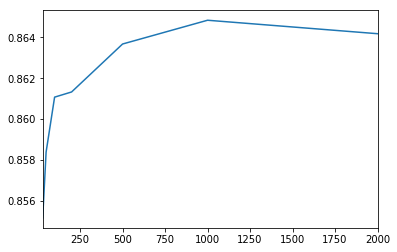

In [101]:
# n_estimator

result = []
n_estimator_option = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_option:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(data,target)
    print(trees, 'Trees')
    roc = roc_auc_score(y, model.oob_prediction_)
    print('C-stat', roc)
    result.append(roc)
    print(" ")

pd.Series(result, n_estimator_option).plot()

auto option
C-stat 0.86483132543
 
None option
C-stat 0.86483132543
 
sqrt option
C-stat 0.864530406161
 
log2 option
C-stat 0.862181638066
 
0.9 option
C-stat 0.865547673069
 
0.2 option
C-stat 0.864530406161
 


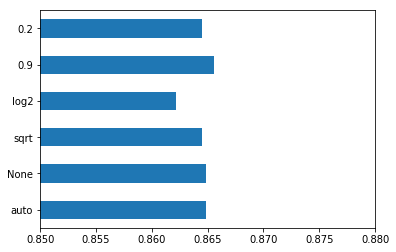

In [102]:
# Max_features 

result = []
max_feature_option = ['auto', None, 'sqrt', 'log2', 0.9,0.2]

for max_features in max_feature_option:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(data,target)
    print(max_features, 'option')
    roc = roc_auc_score(y, model.oob_prediction_)
    print('C-stat', roc)
    result.append(roc)
    print(' ')
   
pd.Series(result, max_feature_option).plot(kind="barh", xlim=(.85,.88))

1 min samples
C-stat 0.86483132543
 
2 min samples
C-stat 0.869981572024
 
3 min samples
C-stat 0.873012068727
 
4 min samples
C-stat 0.875584529021
 
5 min samples
C-stat 0.877246242504
 
6 min samples
C-stat 0.878268835416
 
7 min samples
C-stat 0.877416674656
 
8 min samples
C-stat 0.876841466143
 
9 min samples
C-stat 0.874860192375
 
10 min samples
C-stat 0.872170559976
 


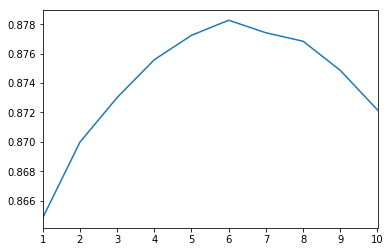

In [103]:
# min_sample_leaf

result =[]
min_sample_leaf_option = [1,2,3,4,5,6,7,8,9,10]

for min_samples in min_sample_leaf_option:
    model = RandomForestRegressor(n_estimators=1000,
                                 oob_score=True,
                                 n_jobs= -1,
                                 random_state= 42,
                                 max_features='auto',
                                 min_samples_leaf=min_samples)
    model.fit(data,target)
    print(min_samples, 'min samples')
    roc = roc_auc_score(y, model.oob_prediction_)
    print('C-stat', roc)
    result.append(roc)
    print(' ')

pd.Series(result, min_sample_leaf_option).plot()

In [44]:
# final model we find all best values

In [106]:
model = RandomForestRegressor(n_estimators=1000,
                             oob_score=True,
                             n_jobs=-1,
                             random_state=42,
                             max_features='auto',
                             min_samples_leaf=6)
model.fit(data,target)
roc= roc_auc_score(y, model.oob_prediction_)
print('C-stat : ', roc)

result= model.fit(data,target)

C-stat :  0.878268835416


In [107]:
result

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

# Load Test Dataset

In [108]:
test_data = pd.read_csv('dataset/test.csv')

In [109]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [110]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [111]:
test_data['Sex'].replace(['female','male'],[0,1],inplace=True)

In [112]:
PassengerId = test_data[['PassengerId']]

In [113]:
del test_data['Name']

In [114]:
del test_data['Ticket']

In [115]:
del test_data['PassengerId']

In [116]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [117]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [118]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return 'None'
test_data['Cabin'] = test_data['Cabin'].apply(clean_cabin)

In [120]:
test_data['Cabin'].value_counts()

None    327
C        35
B        18
D        13
E         9
F         8
A         7
G         1
Name: Cabin, dtype: int64

In [122]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [123]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Cabin       418 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [124]:
test_data['Age'] = test_data['Age'].map(age_band)

In [125]:
test_data['Age'].value_counts(dropna=False)

Age_band_4    141
Age_band_3    131
Age_band_2     47
Age_band_5     46
Age_band_1     22
Age_band_6     20
Age_band_7     10
Age_band_8      1
Name: Age, dtype: int64

In [126]:
# create dummy variables at a time for all categorical variable

categorical_variable2 = ['Age','Pclass','Cabin','Embarked']

for variable2 in categorical_variable2:
    # create missing data wirth 'Missing' world
    test_data[variable2].fillna('Missing', inplace=True)
    # Create array od fummys
    dummies = pd.get_dummies(test_data[variable2], prefix=variable2)
    # Update  x to tindicate dummies and drop the main variable
    
    test_data= pd.concat([test_data, dummies], axis=1)
    test_data.drop([variable2], axis=1, inplace=True)

In [127]:
test_data.head()

,Sex,SibSp,Parch,Fare,Age_Age_band_1,Age_Age_band_2,Age_Age_band_3,Age_Age_band_4,Age_Age_band_5,Age_Age_band_6,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,7.8292,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,7.0000,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,9.6875,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,8.6625,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,1,1,12.2875,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [128]:
data.head()

,Sex,SibSp,Parch,Fare,Age_Age_band_1,Age_Age_band_2,Age_Age_band_3,Age_Age_band_4,Age_Age_band_5,Age_Age_band_6,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Embarked_C,Embarked_Q,Embarked_S
0,1,1,0,7.2500,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,1,0,71.2833,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,7.9250,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,0,53.1000,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,8.0500,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [129]:
# model.predict(test_data)

Survived= model.predict(test_data)

In [130]:
type(test_data)

pandas.core.frame.DataFrame

In [131]:
type(Survived)

numpy.ndarray

In [132]:
Survived = np.where(Survived > 0.5, 1, 0)

In [133]:
Survived
Survived = pd.DataFrame(Survived)

In [134]:
Survived=Survived.rename(columns = {0:'Survived'})
#type(Survived)
Survived.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [135]:
final = pd.concat([test_data,Survived], axis=1)

In [136]:
final.head()

,Sex,SibSp,Parch,Fare,Age_Age_band_1,Age_Age_band_2,Age_Age_band_3,Age_Age_band_4,Age_Age_band_5,Age_Age_band_6,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,0,0,7.8292,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,1,0,7.0000,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
2,1,0,0,9.6875,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1,0,0,8.6625,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,1,12.2875,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [137]:
final = pd.concat([test_data,Survived], axis=1)

In [138]:
# result fo kaggle

kaggle = pd.concat([PassengerId, Survived], axis=1)

In [139]:
kaggle.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [140]:
kaggle.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.342105
std,120.810458,0.474983
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [141]:
kaggle['Survived'].value_counts(dropna=False).head()

0    275
1    143
Name: Survived, dtype: int64

In [142]:
pd.DataFrame.to_csv(kaggle, path_or_buf='Solution_7.csv',index=False)